## Introduction:

This notebook is devoted to implement Q learning algorithm on Left_Right problem .. a case study in Batch Learning paper (Page 14) .. 

Paper Link ==> http://www.jmlr.org/papers/v6/ernst05a.html

Guided by this tutorial ==> http://mnemstudio.org/path-finding-q-learning-tutorial.htm

## Experimental Setup:

num of simulations = 100,000

s = rand(0, 10)     selected at random 

a = [-2, 2] ==> -2: left, 2: right

r = [100, 0, 50] ==> 0: inside the interval, 50: left, 100: right

num of episods = 300 

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. Variables Decleration: 

__Episods:

We'll call each exploration an episode.  
Each episode consists of the agent moving from the initial state to the goal state.  
Each time the agent arrives at the goal state, the program goes to the next episode.
hence, the episod is treated as if it's the number of runs! (Each episode is equivalent to one training session)


In [69]:
## num episods
num_episod = 300

# ## num_experiments
# num_exp = 100000

gamma = 0.9 
alpha = 0.3

## input Tuple
state = np.random.randint(0, 0 + 11 , size=10) # create array from 1 to 10 randomly 
s_next = np.random.randint(0, 0 + 11 , size=10) # create array from 1 to 10 randomly 
action = np.random.choice([0, 1], state.shape[0]) # to be able to access Q indices .. left = 0, right = 1 instead of -2, 2

reward = [np.random.choice([50], state.shape[0]), np.random.choice([100], state.shape[0])]  # reward is a matrix
reward = np.transpose(reward)

## Q_table
Q = np.zeros(np.shape(reward))


## 2. Basic Q Model:

In [70]:
for i in range(num_episod):
    currenct_state = np.random.choice(state) #select random state 
    if currenct_state == 10:
        break
    else:
        current_action = np.random.choice(action)
        next_state = np.random.choice(s_next) #consider moving to the next state

        Q[currenct_state, current_action] = reward[currenct_state, current_action] + gamma*np.max(Q[next_state, :])
        currenct_state = next_state

print Q

[[  50.    0.]
 [   0.    0.]
 [   0.    0.]
 [  50.    0.]
 [   0.  100.]
 [   0.    0.]
 [  50.    0.]
 [   0.    0.]
 [   0.    0.]
 [   0.    0.]]


## Avg. Q and plotting it: 

To be able to compare the performance in every set of episods .. 
let's calculate the mean over the total of 300 episods !

In [71]:
np.mean(Q)

12.5

Let's plot the Q value over each state and its corresponding action .. 

every color represents different possible action 

Text(0,0.5,u'Q Value')

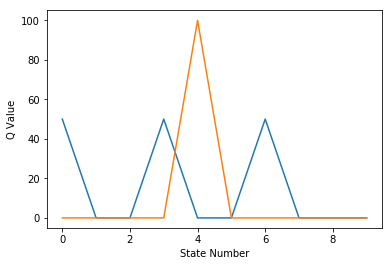

In [72]:
plt.plot(Q)
plt.xlabel("State Number")
plt.ylabel("Q Value")

## Comment:
the above graph is different from those plotted in the batch paper .. cause they represent the result of applying tree pruning algorithm called (Pruned CART Tree) ... read more about ==> https://www.quora.com/Decision-Trees-How-do-you-prune-a-CART

In [85]:
from mpl_toolkits.mplot3d import Axes3D

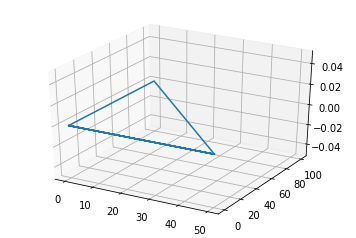

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(Q[:,0], Q[:,1])

The 3-D plot is meaningless ! .. cause the third dimension has no meaning ! 